# Reading and plotting data from WRF-PartMC netCDF file

In [3]:
import numpy as np
from netCDF4 import Dataset
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import wrf

In [4]:
def apply_map_features(axes):
    ''' Adds map features '''
    axes.coastlines(resolution='50m', color='black', linewidth=1)
    states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    axes.add_feature(states_provinces, edgecolor='black')
    
    return

In [32]:
# Load netcdf file
data_dir = '/home/jcurtis2/hackathon_data/'
wrf_filename = '%straining.nc' % data_dir
ncf = Dataset(wrf_filename, "r", format="NETCDF4")

In [6]:
# WRF map projection
cart_proj = cartopy.crs.LambertConformal(central_longitude=-97,central_latitude=38)
# Data projection
data_proj = cartopy.crs.PlateCarree()

In [33]:
# Static data
lats = ncf.variables['XLAT'][0,:,:]
lons = ncf.variables['XLONG'][0,:,:]

In [8]:
i_time = -1 # Scecify output time to plot
i_z = 0 # Specify level to plot

### Plot ozone mixing ratio

/home/weustis/.conda/envs/ashby/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/weustis/.conda/envs/ashby/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


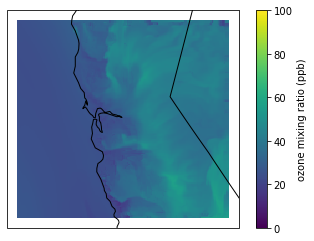

In [9]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['o3']

norm = colors.Normalize(0,100)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('ozone mixing ratio (ppb)')
fig.savefig('example_gas.pdf');

### Plot aerosol number concentration

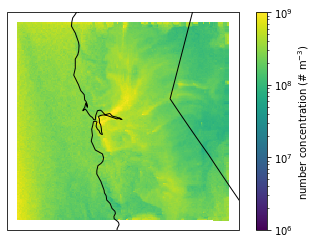

In [10]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['TOT_NUM_CONC'][:]

norm = colors.LogNorm(1e6,1e9)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('number concentration (# m$^{-3}$)')
fig.savefig('example_aerosols.pdf');

### Selecting range of data

It will be necessary to exclude some of the data from the dataset. In particular, removing horizontal boundary conditions (domain edges).

In [11]:
(nt,nz,ny,nx) = data.shape
print(nt,nz,ny,nx)

x_s = 1
x_e = nx-1
y_s = 1
y_e = ny-1
z_s = 0
z_e = nz
t_s = 0
t_e = nt
print(data[t_s:t_e,z_s:z_e,y_s:y_e,x_s:x_e].shape)

133 39 159 169
(133, 39, 157, 167)


In [12]:
ncf.close() # Close netcdf file

In [13]:
import matplotlib.pyplot as plt

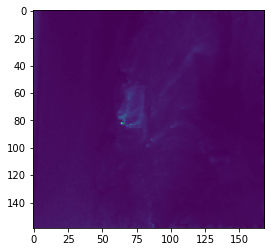

In [14]:
plt.imshow(data[0, 0])

In [39]:
d =ncf.variables['num_a010'][:]

In [40]:
d.shape

(133, 39, 159, 169)

In [27]:
list(ncf.variables.keys())

['ALT',
 'ANOL',
 'AONE',
 'BIN_CENTERS',
 'BIN_EDGES',
 'CELL_VOL',
 'CHI',
 'CHI_CCN',
 'CHI_CCN_BINNED',
 'DN',
 'DNW',
 'D_ALPHA',
 'D_ALPHA_CCN',
 'D_ALPHA_CCN_BINNED',
 'D_GAMMA',
 'D_GAMMA_CCN',
 'D_GAMMA_CCN_BINNED',
 'ETHOOH',
 'MAPFAC_M',
 'MAPFAC_MX',
 'MAPFAC_MY',
 'MAPFAC_U',
 'MAPFAC_UX',
 'MAPFAC_UY',
 'MAPFAC_V',
 'MAPFAC_VX',
 'MAPFAC_VY',
 'MF_VX_INV',
 'MU_U',
 'MU_V',
 'NUM_CONC',
 'N_COMPONENTS',
 'N_PARTS',
 'O3P',
 'OLEI',
 'OLET',
 'P',
 'PB',
 'PM25',
 'RCOOH',
 'REL_HUMID',
 'RW',
 'SULFHOX',
 'T',
 'TEMPERATURE',
 'TOT_BC_NUM_CONC',
 'TOT_BC_NUM_CONC_AGED',
 'TOT_COAGULATION_NUM_CONC',
 'TOT_HYDROPHOBIC_MASS_CONC',
 'TOT_HYDROPHYLIC_MASS_CONC',
 'TOT_MASS_CONC',
 'TOT_NUM_CONC',
 'TOT_NUM_CONC_COAGULATED',
 'TOT_WET_NUM_CONC',
 'Times',
 'U',
 'V',
 'W',
 'WW',
 'XLAT',
 'XLONG',
 'Z',
 'ZNU',
 'ZNW',
 'Z_AT_W',
 'ald2',
 'alk1',
 'ano2',
 'api',
 'api1',
 'api2',
 'aro1',
 'aro2',
 'c2h6',
 'c2o3',
 'ccn_001',
 'ccn_003',
 'ccn_006',
 'ccn_010',
 'ccn_averag